<a href="https://colab.research.google.com/github/ryukirisame/crop-yield-prediction/blob/main/crop%20yield%20predict_4.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np 
import pandas as pd 

# **DATA PREPROCESSING**

### **WORKING ON YIELD DATA**

In [59]:
df_yield = pd.read_csv('yield.csv')
df_yield.shape

(56717, 12)

In [60]:
df_yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [61]:
# RENAMING Value field to hg/ha_yield
df_yield = df_yield.rename(index=str, columns={"Value": "hg/ha_yield"})
df_yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,hg/ha_yield
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [62]:
# dropping unwanted columns.
df_yield = df_yield.drop(['Year Code','Element Code','Element','Year Code','Area Code','Domain Code','Domain','Unit','Item Code'], axis=1)
df_yield.head()

,Area,Item,Year,hg/ha_yield
0,Afghanistan,Maize,1961,14000
1,Afghanistan,Maize,1962,14000
2,Afghanistan,Maize,1963,14260
3,Afghanistan,Maize,1964,14257
4,Afghanistan,Maize,1965,14400


In [20]:
df_yield.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56717 entries, 0 to 56716
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Area         56717 non-null  object
 1   Item         56717 non-null  object
 2   Year         56717 non-null  int64 
 3   hg/ha_yield  56717 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


###**WORKING ON RAINFALL DATA**

In [63]:
df_rain = pd.read_csv('rainfall.csv')
df_rain.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [64]:
df_rain = df_rain.rename(index=str, columns={" Area": 'Area'})

In [23]:
# checking data types 
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area                           6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 210.2+ KB


In [65]:
# converting average_rain_fall_mm_per_year from object to float
df_rain['average_rain_fall_mm_per_year'] = pd.to_numeric(df_rain['average_rain_fall_mm_per_year'],errors = 'coerce')
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           6727 non-null   object 
 1   Year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 210.2+ KB


In [66]:
df_rain = df_rain.dropna()

In [26]:
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5947 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           5947 non-null   object 
 1   Year                           5947 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 185.8+ KB


In [27]:
df_rain.describe()

,Year,average_rain_fall_mm_per_year
count,5947.000000,5947.000000
mean,2001.365899,1124.743232
std,9.526335,786.257365
min,1985.000000,51.000000
25%,1993.000000,534.000000
50%,2001.000000,1010.000000
75%,2010.000000,1651.000000
max,2017.000000,3240.000000


In [67]:
# merge yield dataframe with rain dataframe by year and area columns 
yield_df = pd.merge(df_yield, df_rain, on=['Year','Area'])

In [29]:
yield_df.shape

(25385, 5)

In [68]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year
0,Afghanistan,Maize,1985,16652,327.0
1,Afghanistan,Potatoes,1985,140909,327.0
2,Afghanistan,"Rice, paddy",1985,22482,327.0
3,Afghanistan,Wheat,1985,12277,327.0
4,Afghanistan,Maize,1986,16875,327.0


In [31]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year
count,25385.000000,25385.000000,25385.000000
mean,2001.278787,68312.278353,1254.849754
std,9.143915,75213.292733,804.449430
min,1985.000000,50.000000,51.000000
25%,1994.000000,17432.000000,630.000000
50%,2001.000000,38750.000000,1150.000000
75%,2009.000000,94286.000000,1761.000000
max,2016.000000,554855.000000,3240.000000


### **WORKING ON PESTICIDES DATA**

In [69]:
df_pes = pd.read_csv('pesticides.csv')
df_pes.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [70]:
# renaming and dropping unnecessary columns
df_pes = df_pes.rename(index=str, columns={"Value": "pesticides_tonnes"})
df_pes = df_pes.drop(['Element','Domain','Unit','Item'], axis=1)
df_pes.head()

,Area,Year,pesticides_tonnes
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [71]:
df_pes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4349 entries, 0 to 4348
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               4349 non-null   object 
 1   Year               4349 non-null   int64  
 2   pesticides_tonnes  4349 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 135.9+ KB


In [72]:
# merging Pesticides dataframe with yield dataframe 
yield_df = pd.merge(yield_df, df_pes, on=['Year','Area'])
yield_df.shape

(18949, 6)

In [73]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes
0,Albania,Maize,1990,36613,1485.0,121.0
1,Albania,Potatoes,1990,66667,1485.0,121.0
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0
3,Albania,Sorghum,1990,12500,1485.0,121.0
4,Albania,Soybeans,1990,7000,1485.0,121.0


### **WORKING ON TEMPERATURE DATA**

In [74]:
# now working on temperature data
avg_temp=  pd.read_csv('temp.csv')
avg_temp.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [75]:
avg_temp = avg_temp.rename(index=str, columns={"year": "Year", "country":'Area'})
avg_temp.head()

,Year,Area,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [43]:
avg_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71311 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      71311 non-null  int64  
 1   Area      71311 non-null  object 
 2   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ MB


In [76]:
avg_temp=avg_temp.dropna()

In [77]:
avg_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68764 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      68764 non-null  int64  
 1   Area      68764 non-null  object 
 2   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ MB


In [78]:
yield_df = pd.merge(yield_df,avg_temp, on=['Area','Year'])
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [79]:
yield_df=yield_df.drop(['Year'], axis=1)
yield_df

,Area,Item,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,36613,1485.0,121.00,16.37
1,Albania,Potatoes,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",23333,1485.0,121.00,16.37
3,Albania,Sorghum,12500,1485.0,121.00,16.37
4,Albania,Soybeans,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,22222,657.0,2550.07,19.76


In [80]:
yield_df.shape

(28242, 6)

In [81]:
yield_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28242 entries, 0 to 28241
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   hg/ha_yield                    28242 non-null  int64  
 3   average_rain_fall_mm_per_year  28242 non-null  float64
 4   pesticides_tonnes              28242 non-null  float64
 5   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.5+ MB


### **SAVING DATASET AS CSV**

In [88]:
yield_df.to_csv('yield_df')
# yield_df=pd.read_csv('yield_df')

### **EXPLORING DATA**

In [82]:
yield_df.groupby('Item').count()

,Area,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Item,,,,,
Cassava,2045,2045,2045,2045,2045
Maize,4121,4121,4121,4121,4121
Plantains and others,556,556,556,556,556
Potatoes,4276,4276,4276,4276,4276
"Rice, paddy",3388,3388,3388,3388,3388
Sorghum,3039,3039,3039,3039,3039
Soybeans,3223,3223,3223,3223,3223
Sweet potatoes,2890,2890,2890,2890,2890
Wheat,3857,3857,3857,3857,3857


In [83]:
yield_df['Area'].nunique()

101

In [84]:
yield_df.groupby(['Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

Area
India             327420324
Brazil            167550306
Mexico            130788528
Japan             124470912
Australia         109111062
Pakistan           73897434
Indonesia          69193506
United Kingdom     55419990
Turkey             52263950
Spain              46773540
Name: hg/ha_yield, dtype: int64

In [85]:
yield_df.groupby(['Item','Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

Item            Area          
Cassava         India             142810624
Potatoes        India              92122514
                Brazil             49602168
                United Kingdom     46705145
                Australia          45670386
Sweet potatoes  India              44439538
Potatoes        Japan              42918726
                Mexico             42053880
Sweet potatoes  Mexico             35808592
                Australia          35550294
Name: hg/ha_yield, dtype: int64

In [86]:
yield_df.head()

,Area,Item,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,36613,1485.0,121.0,16.37
1,Albania,Potatoes,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",23333,1485.0,121.0,16.37
3,Albania,Sorghum,12500,1485.0,121.0,16.37
4,Albania,Soybeans,7000,1485.0,121.0,16.37


In [87]:
corr_matrix=yield_df.corr()
corr_matrix

,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
hg/ha_yield,1.000000,0.000962,0.064085,-0.114777
average_rain_fall_mm_per_year,0.000962,1.000000,0.180984,0.313040
pesticides_tonnes,0.064085,0.180984,1.000000,0.030946
avg_temp,-0.114777,0.313040,0.030946,1.000000


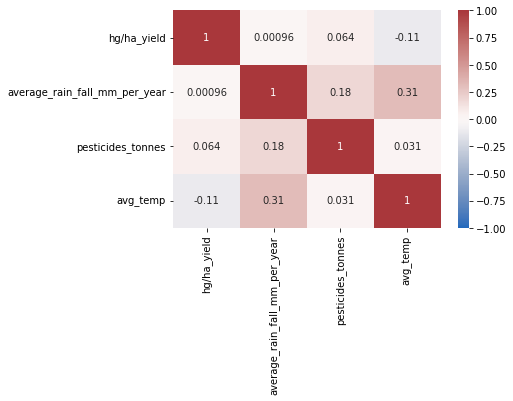

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = yield_df.corr()
sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.savefig('correlation.png', dpi=600)
plt.show()

### **ENCODING, SCALING AND EXTRACTING FEATURES AND LABELS**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
yield_df_onehot = pd.get_dummies(yield_df, columns=['Area',"Item"], prefix = ['Country',"Item"])
yield_df_onehot.head()

,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,36613,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,66667,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,23333,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,12500,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,7000,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# yield_df_onehot=yield_df_onehot.drop(['Year'], axis=1)


In [ ]:
yield_df_onehot.head()

,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,36613,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,66667,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,23333,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,12500,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,7000,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
features=yield_df_onehot.loc[:, yield_df_onehot.columns != 'hg/ha_yield'].values
label=yield_df['hg/ha_yield'].values


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
features=scaler.fit_transform(features) 

In [ ]:
features.shape

(28242, 114)

In [ ]:
label.shape

(28242,)

# **WORKING ON FIRST 10K DATA**

In [ ]:
features_10k=features[:10001, :]
label_10k=label[:10001]

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features_10k, label_10k, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
regressor_linear_10k=LinearRegression()
regressor_linear_10k.fit(train_data, train_labels)
regressor_decision_tree_10k=DecisionTreeRegressor(random_state=0)
regressor_decision_tree_10k.fit(train_data, train_labels)


DecisionTreeRegressor(random_state=0)

In [ ]:
linear_pred_10k=regressor_linear_10k.predict(test_data)
tree_pred_10k=regressor_decision_tree_10k.predict(test_data)

#### **Evaluating model**

In [ ]:
from sklearn.metrics import r2_score
r2_linear_10k = r2_score(test_labels,linear_pred_10k)
r2_tree_10k=r2_score(test_labels, tree_pred_10k)
print("R2 Scores\nLinear Regression:", r2_linear_10k, "\nDecision Tree Regressor:", r2_tree_10k)

R2 Scores
Linear Regression: 0.72510103187916 
Decision Tree Regressor: 0.9510179240626981


In [ ]:
from sklearn.metrics import mean_absolute_error
mae_linear_10k=mean_absolute_error(test_labels, linear_pred_10k)
mae_tree_10k=mean_absolute_error(test_labels, tree_pred_10k)
print("Mean Absolute Error\nLinear Regression:", mae_linear_10k, "\nDecision Tree Regressor:", mae_tree_10k)

Mean Absolute Error
Linear Regression: 29138.021536106946 
Decision Tree Regressor: 5734.793603198401


#### **PLOTTING**

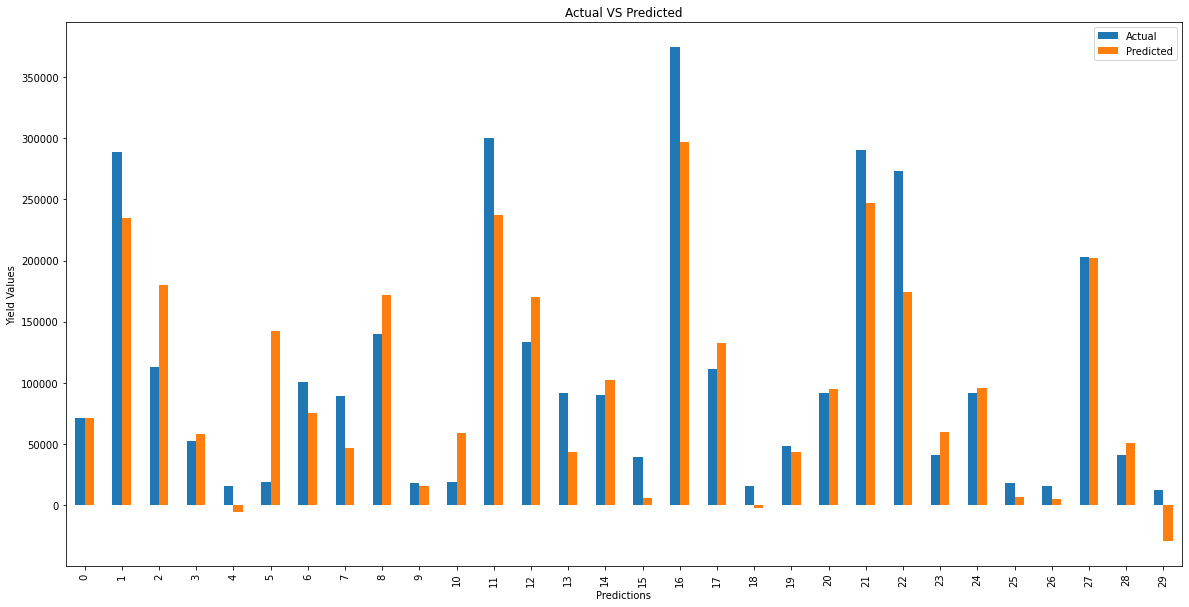

In [ ]:

plot_10k_df_linear=pd.DataFrame({'Actual':test_labels, 'Predicted':linear_pred_10k})[:30]
plot_10k_df_linear.reset_index(inplace=True)
plot_10k_df_linear.plot(x='index',kind='bar', figsize=(20,10))
plt.ylabel('Yield Values')
plt.xlabel('Predictions')
plt.title('Actual VS Predicted')
plt.show()

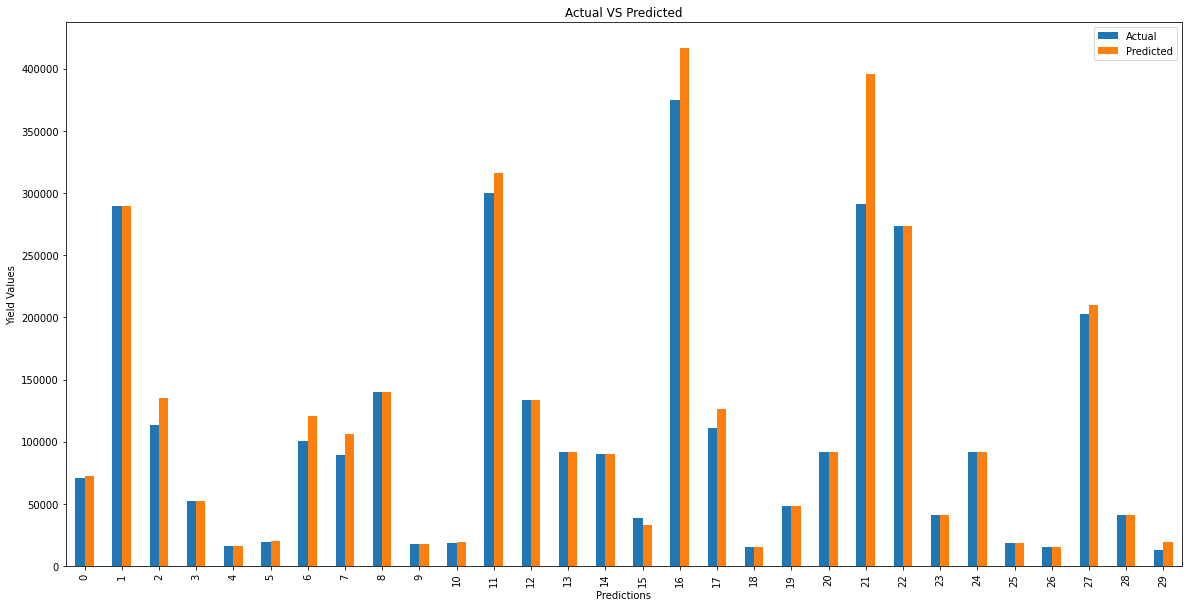

In [ ]:

plot_10k_df_tree=pd.DataFrame({'Actual':test_labels, 'Predicted':tree_pred_10k})[:30]
plot_10k_df_tree.reset_index(inplace=True)
plot_10k_df_tree.plot(x='index',kind='bar', figsize=(20,10))
plt.ylabel('Yield Values')
plt.xlabel('Predictions')
plt.title('Actual VS Predicted')
plt.show()

In [ ]:
print(np.concatenate((linear_pred_10k.reshape(len(linear_pred_10k), 1), test_labels.reshape(len(test_labels), 1)) ,1)[:10])

[[ 70929.375    71151.     ]
 [234766.84375 289220.     ]
 [180113.71875 113330.     ]
 [ 58506.09375  52536.     ]
 [ -5773.90625  15898.     ]
 [142431.75     18998.     ]
 [ 74959.34375 100747.     ]
 [ 46351.71875  89302.     ]
 [172270.625   140264.     ]
 [ 15563.0625   18118.     ]]


In [ ]:
print(np.concatenate((tree_pred_10k.reshape(len(tree_pred_10k), 1), test_labels.reshape(len(test_labels), 1)) ,1)[:10])

[[ 72195.  71151.]
 [289220. 289220.]
 [134922. 113330.]
 [ 52536.  52536.]
 [ 15898.  15898.]
 [ 20000.  18998.]
 [121002. 100747.]
 [106321.  89302.]
 [140264. 140264.]
 [ 18118.  18118.]]


# **WORKING ON FIRST 20K ROWS**

In [ ]:
features_20k=features[:20001, :]
label_20k=label[:20001]

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(features_20k, label_20k, test_size=0.2, random_state=0)

In [ ]:
regressor_linear_20k=LinearRegression()
regressor_linear_20k.fit(train_data, train_labels)
regressor_decision_tree_20k=DecisionTreeRegressor(random_state=0)
regressor_decision_tree_20k.fit(train_data, train_labels)

DecisionTreeRegressor(random_state=0)

In [ ]:
linear_pred_20k=regressor_linear_20k.predict(test_data)
tree_pred_20k=regressor_decision_tree_20k.predict(test_data)

#### **EVALUATING MODELS**

In [ ]:
from sklearn.metrics import mean_absolute_error
mae_linear_20k=mean_absolute_error(test_labels, linear_pred_20k)
mae_tree_20k=mean_absolute_error(test_labels, tree_pred_20k)
print("Mean Absolute Error\nLinear Regression:", mae_linear_20k, "\nDecision Tree Regressor:", mae_tree_20k)

Mean Absolute Error
Linear Regression: 29526.06898275431 
Decision Tree Regressor: 5374.519161876197


In [ ]:
from sklearn.metrics import r2_score
r2_linear_20k = r2_score(test_labels,linear_pred_20k)
r2_tree_20k=r2_score(test_labels, tree_pred_20k)
print("R2 Scores\nLinear Regression:", r2_linear_20k, "\nDecision Tree Regressor:", r2_tree_20k)

R2 Scores
Linear Regression: 0.738071543598124 
Decision Tree Regressor: 0.9625174136568675


#### **PLOTTING**

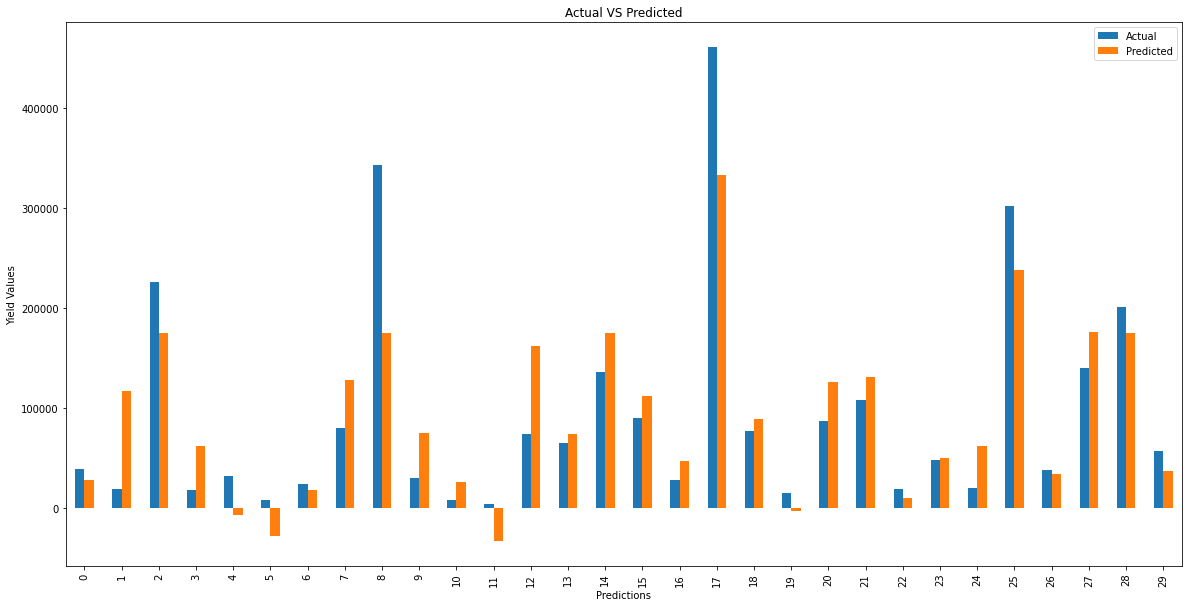

In [ ]:

plot_20k_df_linear=pd.DataFrame({'Actual':test_labels, 'Predicted':linear_pred_20k})[:30]
plot_20k_df_linear.reset_index(inplace=True)
plot_20k_df_linear.plot(x='index',kind='bar', figsize=(20,10))
plt.ylabel('Yield Values')
plt.xlabel('Predictions')
plt.title('Actual VS Predicted')
plt.show()

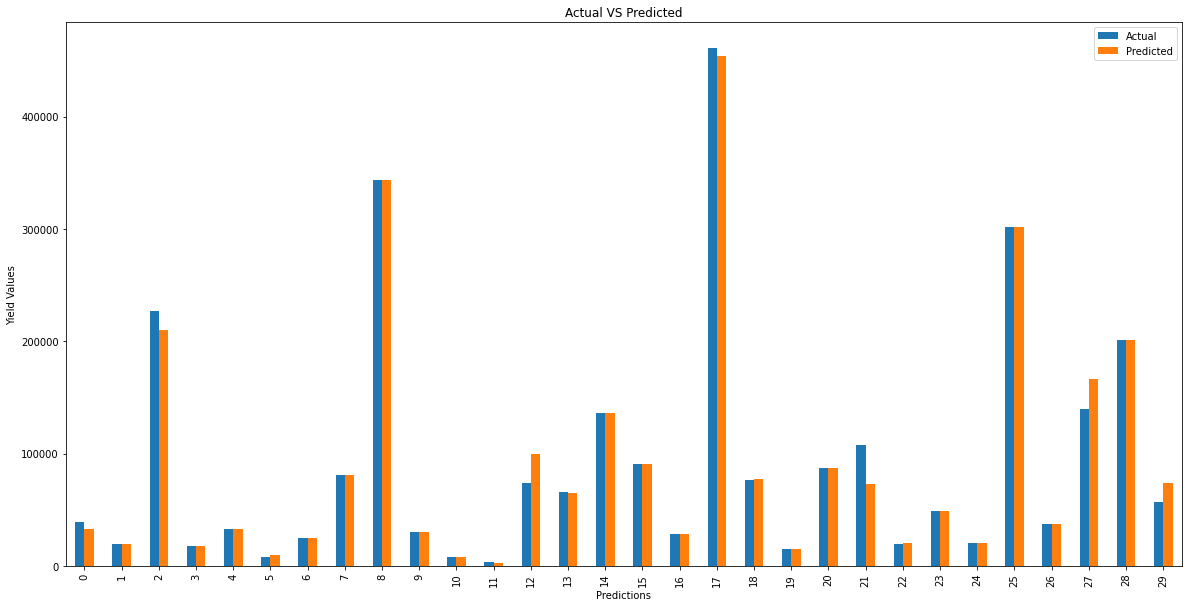

In [ ]:
plot_20k_df_tree=pd.DataFrame({'Actual':test_labels, 'Predicted':tree_pred_20k})[:30]
plot_20k_df_tree.reset_index(inplace=True)
plot_20k_df_tree.plot(x='index',kind='bar', figsize=(20,10))
plt.ylabel('Yield Values')
plt.xlabel('Predictions')
plt.title('Actual VS Predicted')
plt.show()

In [ ]:
print(np.concatenate((linear_pred_20k.reshape(len(linear_pred_20k), 1), test_labels.reshape(len(test_labels), 1)) ,1)[:10])

[[ 28672.  38910.]
 [117120.  19455.]
 [174976. 226577.]
 [ 62592.  18025.]
 [ -6528.  32680.]
 [-27776.   8000.]
 [ 18432.  24761.]
 [128256.  80643.]
 [175616. 343433.]
 [ 75392.  30279.]]


In [ ]:
print(np.concatenate((tree_pred_20k.reshape(len(tree_pred_20k), 1), test_labels.reshape(len(test_labels), 1)) ,1)[:10])

[[ 32888.  38910.]
 [ 20000.  19455.]
 [209840. 226577.]
 [ 18025.  18025.]
 [ 32629.  32680.]
 [ 10000.   8000.]
 [ 24761.  24761.]
 [ 80643.  80643.]
 [343433. 343433.]
 [ 30279.  30279.]]


# **WORKING ON WHOLE DATASET**

In [ ]:
features_whole=features[:, :]
label_whole=label[:]

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(features_whole, label_whole, test_size=0.2, random_state=0)

In [ ]:
regressor_linear_whole=LinearRegression()
regressor_linear_whole.fit(train_data, train_labels)
regressor_decision_tree_whole=DecisionTreeRegressor(random_state=0)
regressor_decision_tree_whole.fit(train_data, train_labels)

DecisionTreeRegressor(random_state=0)

In [ ]:
linear_pred_whole=regressor_linear_whole.predict(test_data)
tree_pred_whole=regressor_decision_tree_whole.predict(test_data)

#### **EVALUATING MODELS**

In [ ]:
from sklearn.metrics import r2_score
r2_linear_whole = r2_score(test_labels,linear_pred_whole)
r2_tree_whole=r2_score(test_labels, tree_pred_whole)
print("R2 Scores\nLinear Regression:", r2_linear_whole, "\nDecision Tree Regressor:", r2_tree_whole)

R2 Scores
Linear Regression: 0.7518058709692876 
Decision Tree Regressor: 0.9599830237898023


In [ ]:
from sklearn.metrics import mean_absolute_error
mae_linear_whole=mean_absolute_error(test_labels, linear_pred_whole)
mae_tree_whole=mean_absolute_error(test_labels, tree_pred_whole)
print("Mean Absolute Error\nLinear Regression:", mae_linear_whole, "\nDecision Tree Regressor:", mae_tree_whole)

Mean Absolute Error
Linear Regression: 29744.274384846874 
Decision Tree Regressor: 6237.231987962471


#### **PLOTTING**

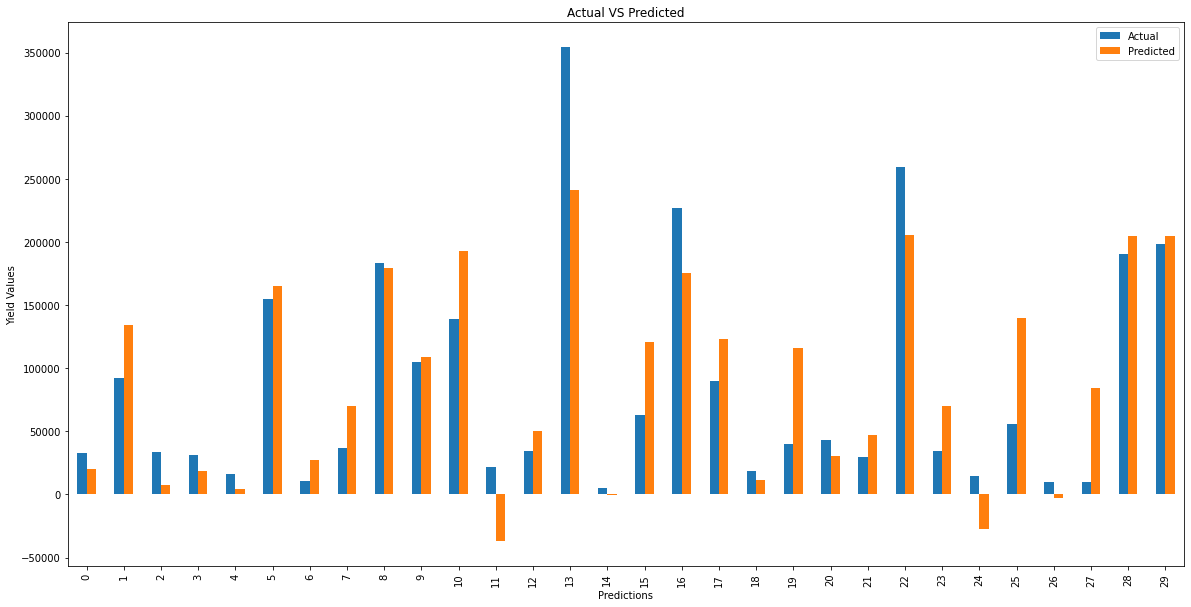

In [ ]:
plot_whole_df_linear=pd.DataFrame({'Actual':test_labels, 'Predicted':linear_pred_whole})[:30]
plot_whole_df_linear.reset_index(inplace=True)
plot_whole_df_linear.plot(x='index',kind='bar', figsize=(20,10))
plt.ylabel('Yield Values')
plt.xlabel('Predictions')
plt.title('Actual VS Predicted')
plt.show()

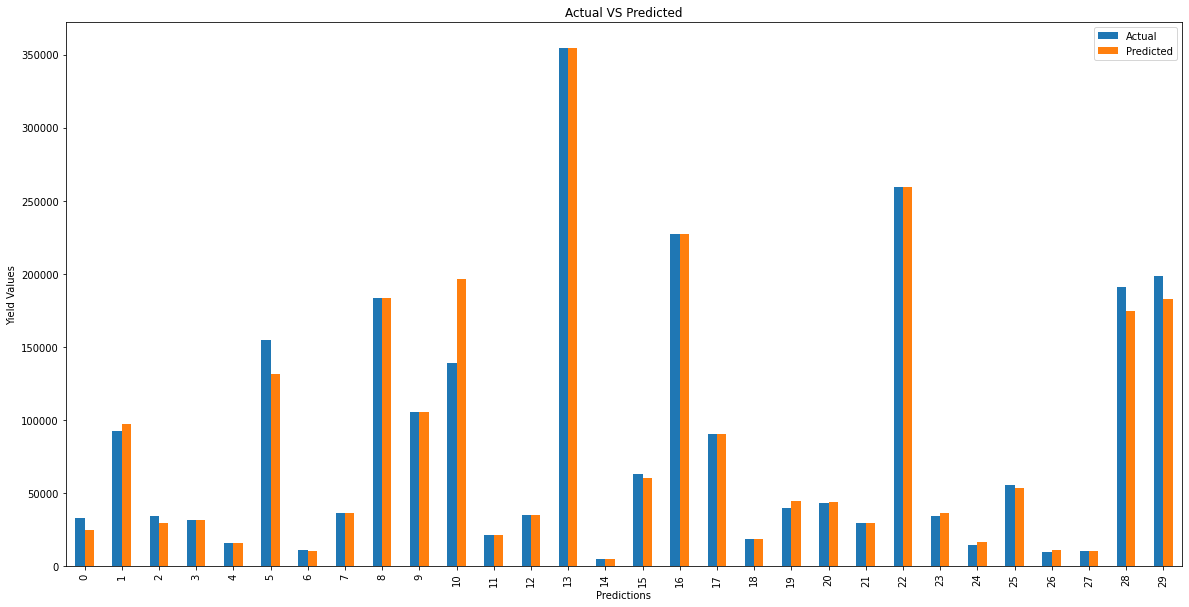

In [ ]:
plot_whole_df_tree=pd.DataFrame({'Actual':test_labels, 'Predicted':tree_pred_whole})[:30]
plot_whole_df_tree.reset_index(inplace=True)
plot_whole_df_tree.plot(x='index',kind='bar', figsize=(20,10))
plt.ylabel('Yield Values')
plt.xlabel('Predictions')
plt.title('Actual VS Predicted')
plt.show()

In [ ]:
# np.set_printoptions(precision=5)
print(np.concatenate((linear_pred_whole.reshape(len(linear_pred_whole), 1), test_labels.reshape(len(test_labels), 1)) ,1)[:10])

[[ 19852.  33157.]
 [134348.  92373.]
 [  7100.  33919.]
 [ 18716.  31214.]
 [  4364.  16010.]
 [165404. 154928.]
 [ 27288.  11029.]
 [ 70408.  36429.]
 [178996. 183405.]
 [108932. 105267.]]


In [ ]:
print(np.concatenate((tree_pred_whole.reshape(len(tree_pred_whole), 1), test_labels.reshape(len(test_labels), 1)) ,1)[:10])

[[ 24602.33333333  33157.        ]
 [ 97487.          92373.        ]
 [ 29411.          33919.        ]
 [ 31214.          31214.        ]
 [ 16103.          16010.        ]
 [131429.         154928.        ]
 [ 10050.          11029.        ]
 [ 36429.          36429.        ]
 [183405.         183405.        ]
 [105267.         105267.        ]]
